In [ ]:
import numpy as np
import tensorflow as tf
import random as python_random

def reset_seeds():
   np.random.seed(123) 
   python_random.seed(123)
   tf.random.set_seed(1234)

reset_seeds()

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
pm=pd.read_csv('SAHITTO.csv')

pm.head()

,title,poem,writer,label
0,সেই ছেলে হবে কবে,আমাদের দেশে সেই ছেলে হবে কবে যারা কোথায় না বড় ...,মুহম্মদ জাফর ইকবাল,Policy
1,সন্ত্রাসীদের প্রথম পাঠ,অ অজ্ঞান পার্টি অজ্ঞান পার্টি আসছে ঐ আ আগুন আগ...,মুহম্মদ জাফর ইকবাল,Policy
2,পারো তো ধর্ষণ করো,"আর ধর্ষিতা হয়ো না, আর না আর যেন কোনও দুঃসংবাদ ...",তসলিমা নাসরিন,Policy
3,ফেস অফ,মেয়েটি আসছে মুখটি পোড়া মুখটি এখন আর মুখের মত দ...,তসলিমা নাসরিন,Policy
4,মন উঠো,"মন তুমি ওঠো, ওঠো তুমি, তুমি ওঠো মন, মন মন মন ও...",তসলিমা নাসরিন,Policy


In [ ]:
pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   2207 non-null   object
 1   poem    2207 non-null   object
 2   writer  2207 non-null   object
 3   label   2207 non-null   object
dtypes: object(4)
memory usage: 69.1+ KB


In [ ]:
pm.describe()

,title,poem,writer,label
count,2207,2207,2207,2207
unique,1918,2020,40,11
top,তুমি,বল বীর - বল উন্নত মম শির! শির নেহারি’ আমারি নত...,রবীন্দ্রনাথ ঠাকুর,Miscellaneous
freq,5,4,251,811


In [ ]:
pm.label.unique()

array(['Policy', 'Religious', 'War', 'Humanity', 'Nature',
       'Miscellaneous', 'Love', 'Metaphor', 'Separation', 'Children',
       'Patriotic'], dtype=object)

In [ ]:
pm_name=['Policy', 'Religious', 'War', 'Humanity', 'Nature', 'Metaphor', 'Separation', 'Children','Patriotic']

def drop_column(ex):
  omg=pm[(pm['label']==ex)].index
  pm.drop(omg, inplace=True)

for x in range(len(pm_name)):
  drop_column(pm_name[x])

In [ ]:
pm.label.unique()

array(['Miscellaneous', 'Love'], dtype=object)

In [ ]:
pm.describe()

,title,poem,writer,label
count,1311,1311,1311,1311
unique,1275,1307,34,2
top,তুমি,"তোমাকে বিশ্বাস করেছিলাম, যা কিছু নিজের ছিল দিয...",মহাদেব সাহা,Miscellaneous
freq,5,2,170,811


In [ ]:
pm.head()

,title,poem,writer,label
295,না,কিছুতেই রাজি নয় বল বাবাজি নারাজি নারাজি নারাজ...,মুহম্মদ জাফর ইকবাল,Miscellaneous
296,তুই কোথায় শেফালি,আমার খুব দেখতে ইচ্ছে করছে তুই কোথায় আমার খুব ...,তসলিমা নাসরিন,Miscellaneous
297,না-থাকা,একটি ভীষণ না-থাকাকে সঙ্গে নিয়ে আমি প্রতি রাত্...,তসলিমা নাসরিন,Miscellaneous
298,কলকাতা তুই তোর হৃদয়,"সবখানেই পুঁজিবাদের হাতি হাঁটছে, সবখানেই সাম্রা...",তসলিমা নাসরিন,Miscellaneous
299,শেষ পর্যন্ত,"না, কলকাতা শেষপর্যন্ত তুমিও আমার কোনও সমাধান ন...",তসলিমা নাসরিন,Miscellaneous


In [ ]:
pm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 295 to 1605
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1311 non-null   object
 1   poem    1311 non-null   object
 2   writer  1311 non-null   object
 3   label   1311 non-null   object
dtypes: object(4)
memory usage: 51.2+ KB


In [ ]:
import re
whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
bangla_fullstop = u"\u0964"
punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/—,¦!?;-]+"


for i in range(len(pm)):
  txt=pm.poem.values[i]

  txt = whitespace.sub(" ",txt).strip()
  txt = re.sub(punctSeq, " ", txt)
  txt = re.sub(bangla_fullstop, "",txt)
  txt = re.sub(punc, " ", txt)

  pm.poem.values[i]=txt

  

#txt = whitespace.sub(" ",txt).strip()
#txt = re.sub(punctSeq, " ", txt)
#txt = re.sub(bangla_fullstop, "",txt)
#txt = re.sub(punc, " ", txt)
#print(txt)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
 
pm['label']=le.fit_transform(pm['label']) 

In [ ]:
pm.label.unique()

array([1, 0])

In [ ]:
pm1=pm.sample(frac=1, random_state=42)

pm1.head()

,title,poem,writer,label
1415,নকশী কাঁথার মাঠ – ১২,বার রাইত তুই যা রে পোহাইয়ে বেলা গে ল সন্ধ্যা...,জসীম উদ্‌দীন,0
1367,ভিতর-বাইরে বিষম যুদ্ধ,ইচ্ছে ছিলো তোমার কাছে ঘুরতে ঘুরতে যাবোই আমার প...,শক্তি চট্টোপাধ্যায়,0
493,মাঠের সন্ধ্যা,অন্যমনে যেতে যেতে হঠাৎ যদি মাঠের মধ্যে দাঁড়াই...,নীরেন্দ্রনাথ চক্রবর্তী,1
870,সোনার তরী,গগনে গরজে মেঘ ঘন বরষা কূলে একা বসে আছি নাহি ...,রবীন্দ্রনাথ ঠাকুর,1
626,শস্যযাত্রা,তোমাকে ধরবে না এই কালো পাটকেলে কামিজে খুলে এই ...,মহাদেব সাহা,1


In [ ]:
pm1.label.unique()

array([0, 1])

In [ ]:
pm1['label'].value_counts()

1    811
0    500
Name: label, dtype: int64

In [ ]:
Y=pd.get_dummies(pm1.label).values

print('Shape of label tensor:',Y.shape)

Shape of label tensor: (1311, 2)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cnt_vec=CountVectorizer()
X=cnt_vec.fit_transform(pm1.poem.values)

print(X.shape)

(1311, 4116)


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
tfidf=TfidfTransformer()
X=tfidf.fit_transform(X)

print(X.shape)

(1311, 4116)


In [ ]:
print(pm1.label)

1415    0
1367    0
493     1
870     1
626     1
       ..
1390    0
1425    0
1589    0
1155    0
1421    0
Name: label, Length: 1311, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, pm1.label, test_size=0.2, random_state=42)

print('Train Set Size:', X_train.shape, Y_train.shape)
print('Test Set size:', X_test.shape, Y_test.shape)

Train Set Size: (1048, 4116) (1048,)
Test Set size: (263, 4116) (263,)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
penalty_lb=['l2', 'none']

C_lb=np.logspace(-4,4,20)

solver_lb=['lbfgs']

max_iter_lb=[100, 300, 500, 1000]


hyperparameters_lb=dict(C=C_lb, penalty=penalty_lb, solver=solver_lb, max_iter=max_iter_lb)

In [ ]:
clf_lb=GridSearchCV(model, hyperparameters_lb, cv=5, verbose=True, n_jobs=-1)

In [ ]:
best_model_log_lb=clf_lb.fit(X_train, Y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


In [ ]:
best_model_log_lb.best_estimator_

LogisticRegression(C=4.281332398719396)

In [ ]:
print(f'Accuracy : {best_model_log_lb.score(X_test, Y_test):.3f}')

Accuracy : 0.829


In [ ]:
Y_pred_log=best_model_log_lb.predict(X_test)

In [ ]:
penalty=['l1', 'l2']

C=np.logspace(-4,4,20)

solver=['liblinear']

max_iter=[100, 300, 500, 1000]


hyperparameters=dict(C=C, penalty=penalty, solver=solver, max_iter=max_iter)

In [ ]:
clf=GridSearchCV(model, hyperparameters, cv=5, verbose=True, n_jobs=-1)

In [ ]:
best_model_log=clf.fit(X_train, Y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


In [ ]:
best_model_log.best_estimator_

LogisticRegression(C=4.281332398719396, solver='liblinear')

In [ ]:
print(f'Accuracy : {best_model_log.score(X_test, Y_test):.3f}')

Accuracy : 0.829


In [ ]:
Y_pred_log=best_model_log.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred_log))

              precision    recall  f1-score   support

           0       0.85      0.67      0.75       101
           1       0.82      0.93      0.87       162

    accuracy                           0.83       263
   macro avg       0.83      0.80      0.81       263
weighted avg       0.83      0.83      0.82       263



In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
modelNB=MultinomialNB()

In [ ]:
mnb_alpha=[0.01, 0.0001, 0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

mnb_fit_prior=[True, False]

mnb_class_prior=[None, [0.1,0.9], [0.2, 0.8], [0.25, 0.5]]


hyperparametersNB=dict(alpha=mnb_alpha, fit_prior=mnb_fit_prior, class_prior=mnb_class_prior)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf_NB=GridSearchCV(modelNB, hyperparametersNB, cv=5, verbose=True, n_jobs=-1)

In [ ]:
best_model_NB=clf_NB.fit(X_train, Y_train)

Fitting 5 folds for each of 104 candidates, totalling 520 fits


In [ ]:
best_model_NB.best_estimator_

MultinomialNB(alpha=0.3, fit_prior=False)

In [ ]:
print(f'Accuracy : {best_model_NB.score(X_test, Y_test):.3f}')

Accuracy : 0.856


In [ ]:
Y_pred_NB=best_model_NB.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred_NB))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79       101
           1       0.84      0.95      0.89       162

    accuracy                           0.86       263
   macro avg       0.87      0.83      0.84       263
weighted avg       0.86      0.86      0.85       263



In [ ]:
from sklearn.svm import SVC

In [ ]:
modelSVM=SVC()

In [ ]:
C=[0.001, 0.1, 1, 10, 25, 50, 100]

gamma=[1, 0.1, 0.01, 0.001, 0.0001]

kernel=['rbf', 'poly', 'sigmoid', 'linear']

hyperparametersSVM=dict(C=C, gamma=gamma, kernel=kernel)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clfSVM=GridSearchCV(modelSVM, hyperparametersSVM, cv=5, verbose=True, n_jobs=-1)

In [ ]:
best_model_SVM=clfSVM.fit(X_train, Y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


In [ ]:
best_model_SVM.best_estimator_

SVC(C=50, gamma=1)

In [ ]:
print(f'Accuracy : {best_model_SVM.score(X_test, Y_test):.3f}')

Accuracy : 0.829


In [ ]:
Y_pred_SVM=best_model_SVM.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred_SVM))

              precision    recall  f1-score   support

           0       0.86      0.66      0.75       101
           1       0.82      0.93      0.87       162

    accuracy                           0.83       263
   macro avg       0.84      0.80      0.81       263
weighted avg       0.83      0.83      0.82       263



In [ ]:
pred_prob_log=best_model_log.predict_proba(X_test)

In [ ]:
pred_prob_NB=best_model_NB.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score,auc

fpr_svm,tpr_svm,threshold_svm=roc_curve(Y_test, Y_pred_SVM)

In [ ]:
auc_svm=auc(fpr_svm, tpr_svm)

In [ ]:
fpr_log,tpr_log,thres_log=roc_curve(Y_test, pred_prob_log[:,1], pos_label=1)
fpr_NB,tpr_NB,thres_NB=roc_curve(Y_test, pred_prob_NB[:,1], pos_label=1)

random_probs=[0 for i in range(len(Y_test))]
p_fpr,p_tpr,_=roc_curve(Y_test, random_probs, pos_label=1)

In [ ]:
auc_score_log=roc_auc_score(Y_test, pred_prob_log[:,1])
auc_score_NB=roc_auc_score(Y_test, pred_prob_NB[:,1])

print(auc_score_log, auc_score_NB, auc_svm)

0.9151692947072485 0.9375993154871043 0.797732551032881


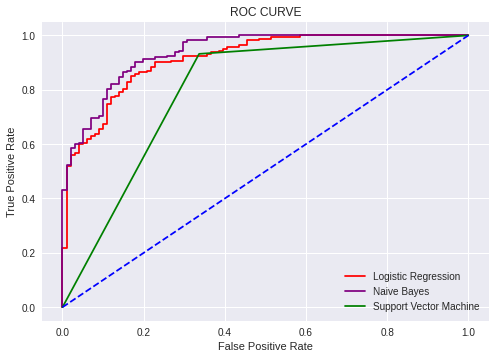

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(fpr_log,tpr_log, linestyle='-', color='red', label='Logistic Regression')
plt.plot(fpr_NB,tpr_NB, linestyle='-', color='purple', label='Naive Bayes')
plt.plot(fpr_svm,tpr_svm, linestyle='-', color='green', label='Support Vector Machine')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')


plt.title('ROC CURVE')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()

In [ ]:
pm_dl=pd.read_csv('SAHITTO.csv')
pm_dl.head()

,title,poem,writer,label
0,সেই ছেলে হবে কবে,আমাদের দেশে সেই ছেলে হবে কবে যারা কোথায় না বড় ...,মুহম্মদ জাফর ইকবাল,Policy
1,সন্ত্রাসীদের প্রথম পাঠ,অ অজ্ঞান পার্টি অজ্ঞান পার্টি আসছে ঐ আ আগুন আগ...,মুহম্মদ জাফর ইকবাল,Policy
2,পারো তো ধর্ষণ করো,"আর ধর্ষিতা হয়ো না, আর না আর যেন কোনও দুঃসংবাদ ...",তসলিমা নাসরিন,Policy
3,ফেস অফ,মেয়েটি আসছে মুখটি পোড়া মুখটি এখন আর মুখের মত দ...,তসলিমা নাসরিন,Policy
4,মন উঠো,"মন তুমি ওঠো, ওঠো তুমি, তুমি ওঠো মন, মন মন মন ও...",তসলিমা নাসরিন,Policy


In [ ]:
pm_dl.label.unique()

array(['Policy', 'Religious', 'War', 'Humanity', 'Nature',
       'Miscellaneous', 'Love', 'Metaphor', 'Separation', 'Children',
       'Patriotic'], dtype=object)

In [ ]:
pm_name=['Policy', 'Religious', 'War', 'Humanity', 'Nature', 'Separation', 'Children', 'Patriotic', 'Metaphor']

def drop_column(ex):
  omg=pm_dl[(pm_dl['label'] == ex)].index
  pm_dl.drop(omg, inplace=True)

for x in range(len(pm_name)):
  drop_column(pm_name[x])

In [ ]:
pm_dl.label.unique()

array(['Miscellaneous', 'Love'], dtype=object)

In [ ]:
pm_dl.describe()

,title,poem,writer,label
count,1311,1311,1311,1311
unique,1275,1307,34,2
top,তুমি,"তোমাকে বিশ্বাস করেছিলাম, যা কিছু নিজের ছিল দিয...",মহাদেব সাহা,Miscellaneous
freq,5,2,170,811


In [ ]:
pm_dl.head()

,title,poem,writer,label
295,না,কিছুতেই রাজি নয় বল বাবাজি নারাজি নারাজি নারাজ...,মুহম্মদ জাফর ইকবাল,Miscellaneous
296,তুই কোথায় শেফালি,আমার খুব দেখতে ইচ্ছে করছে তুই কোথায় আমার খুব ...,তসলিমা নাসরিন,Miscellaneous
297,না-থাকা,একটি ভীষণ না-থাকাকে সঙ্গে নিয়ে আমি প্রতি রাত্...,তসলিমা নাসরিন,Miscellaneous
298,কলকাতা তুই তোর হৃদয়,"সবখানেই পুঁজিবাদের হাতি হাঁটছে, সবখানেই সাম্রা...",তসলিমা নাসরিন,Miscellaneous
299,শেষ পর্যন্ত,"না, কলকাতা শেষপর্যন্ত তুমিও আমার কোনও সমাধান ন...",তসলিমা নাসরিন,Miscellaneous


In [ ]:
import re
whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
bangla_fullstop = u"\u0964"
punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/—,¦!?;-]+"


for i in range(len(pm_dl)):
  txt=pm_dl.poem.values[i]

  txt = whitespace.sub(" ",txt).strip()
  txt = re.sub(punctSeq, " ", txt)
  txt = re.sub(bangla_fullstop, "",txt)
  txt = re.sub(punc, " ", txt)

  pm_dl.poem.values[i]=txt



In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

pm_dl['label']=le.fit_transform(pm_dl['label'])

In [ ]:
pm_dl.label.unique()

array([1, 0])

In [ ]:
pm1_dl=pm_dl.sample(frac=1, random_state=42)

pm1_dl.head()

,title,poem,writer,label
1415,নকশী কাঁথার মাঠ – ১২,বার রাইত তুই যা রে পোহাইয়ে বেলা গে ল সন্ধ্যা...,জসীম উদ্‌দীন,0
1367,ভিতর-বাইরে বিষম যুদ্ধ,ইচ্ছে ছিলো তোমার কাছে ঘুরতে ঘুরতে যাবোই আমার প...,শক্তি চট্টোপাধ্যায়,0
493,মাঠের সন্ধ্যা,অন্যমনে যেতে যেতে হঠাৎ যদি মাঠের মধ্যে দাঁড়াই...,নীরেন্দ্রনাথ চক্রবর্তী,1
870,সোনার তরী,গগনে গরজে মেঘ ঘন বরষা কূলে একা বসে আছি নাহি ...,রবীন্দ্রনাথ ঠাকুর,1
626,শস্যযাত্রা,তোমাকে ধরবে না এই কালো পাটকেলে কামিজে খুলে এই ...,মহাদেব সাহা,1


In [ ]:
pm1_dl.label.unique()

array([0, 1])

In [ ]:
NUM_WORDS=40000
MAX_SEQUENCE_LENGTH=200

In [ ]:
import tensorflow
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [ ]:
tokenizer=Tokenizer(num_words=NUM_WORDS,lower=False,)
tokenizer.fit_on_texts(pm1_dl.poem.values)
word_index=tokenizer.word_index

print(word_index)
print('Unique Tokens : %s'%len(word_index))

{'না': 1, 'আমি': 2, 'আমার': 3, 'এই': 4, 'তুমি': 5, 'যে': 6, 'তোমার': 7, 'তার': 8, 'আর': 9, 'সে': 10, 'করে': 11, 'মতো': 12, 'কি': 13, 'সেই': 14, 'যেন': 15, 'এ': 16, 'থেকে': 17, 'আছে': 18, 'মনে': 19, 'ও': 20, 'যায়': 21, 'এক': 22, 'সব': 23, 'কথা': 24, 'আজ': 25, 'হয়ে': 26, 'নেই': 27, 'হবে': 28, 'শুধু': 29, 'তো': 30, 'যদি': 31, 'কাছে': 32, 'রে': 33, 'হয়': 34, 'কিছু': 35, 'কোনো': 36, 'তাই': 37, 'তবু': 38, 'কেউ': 39, 'কী': 40, 'কত': 41, 'নাই': 42, 'বলে': 43, 'এখন': 44, 'গেছে': 45, 'কে': 46, 'আসে': 47, 'করি': 48, 'মোর': 49, 'দিয়ে': 50, 'কেন': 51, 'পড়ে': 52, 'মুখ': 53, 'হতে': 54, 'জল': 55, 'ছিল': 56, 'বুকে': 57, 'দিকে': 58, 'হাত': 59, 'চলে': 60, 'একটি': 61, 'হাতে': 62, 'ফুল': 63, 'জানি': 64, 'এসে': 65, 'তারা': 66, 'ফিরে': 67, 'চোখ': 68, 'আমাকে': 69, 'জীবন': 70, 'পরে': 71, 'মধ্যে': 72, '–': 73, 'আমাদের': 74, 'আকাশ': 75, 'দেখে': 76, 'নিয়ে': 77, 'ওঠে': 78, 'দেখি': 79, 'আবার': 80, 'গান': 81, 'মানুষ': 82, 'ঘরে': 83, 'তাহার': 84, 'আলো': 85, 'অনেক': 86, 'গেল': 87, 'মতন': 88, 'হে': 89, 'যেতে': 90

In [ ]:
sequences=tokenizer.texts_to_sequences(pm1_dl.poem.values)

X_DL=pad_sequences(sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')

print('Shape of data tensor:',X_DL.shape)
#print(X[0])

Shape of data tensor: (1311, 200)


In [ ]:
Y_DL=pd.get_dummies(pm1_dl.label).values

print('Shape of label tensor:',Y_DL.shape)

Shape of label tensor: (1311, 2)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_DL, X_test_DL, Y_train_DL, Y_test_DL = train_test_split(X_DL, Y_DL, test_size=0.2, random_state=42)

print('Train Set Size:', X_train_DL.shape, Y_train_DL.shape)
print('Test Set size:', X_test_DL.shape, Y_test_DL.shape)

Train Set Size: (1048, 200) (1048, 2)
Test Set size: (263, 200) (263, 2)


In [ ]:
print(X_train_DL.shape[1])

200


In [ ]:
print(Y_DL.shape[1])

2


In [ ]:
#LSTM MODEL................

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow.keras.layers import Embedding

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           1280000   
                                                                 
 lstm (LSTM)                 (None, 2)                 280       
                                                                 
 dense (Dense)               (None, 2)                 6         
                                                                 
Total params: 1,280,286
Trainable params: 1,280,286
Non-trainable params: 0
_________________________________________________________________


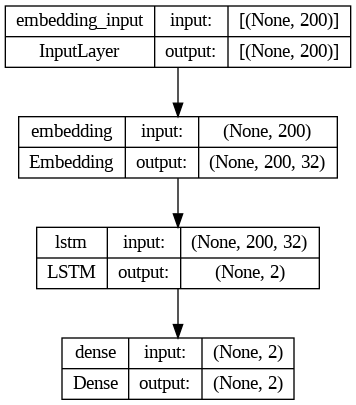

In [ ]:
EMBEDDING_DIM=32

model_lstm=Sequential()
model_lstm.add(Embedding(NUM_WORDS, EMBEDDING_DIM, input_length=X_DL.shape[1]))
model_lstm.add(LSTM(2, dropout=0.2, recurrent_dropout=0.2, activation='tanh'))
model_lstm.add(Dense(Y_DL.shape[1], activation='sigmoid'))

model_lstm.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])

model_lstm.summary()

tf.keras.utils.plot_model(model_lstm, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

In [ ]:
epochs=15
batch_size=32

In [ ]:
history_lstm=model_lstm.fit(X_train_DL, Y_train_DL, epochs=epochs, batch_size=batch_size,  validation_split=0.2) 

Epoch 1/15
27/27 [==============================] - 21s 616ms/step - loss: 0.6847 - accuracy: 0.6158 - val_loss: 0.6885 - val_accuracy: 0.5714
Epoch 2/15
27/27 [==============================] - 8s 286ms/step - loss: 0.6704 - accuracy: 0.6313 - val_loss: 0.6892 - val_accuracy: 0.5714
Epoch 3/15
27/27 [==============================] - 14s 524ms/step - loss: 0.6620 - accuracy: 0.6313 - val_loss: 0.6895 - val_accuracy: 0.5714
Epoch 4/15
27/27 [==============================] - 6s 236ms/step - loss: 0.6536 - accuracy: 0.6313 - val_loss: 0.6896 - val_accuracy: 0.5714
Epoch 5/15
27/27 [==============================] - 8s 287ms/step - loss: 0.6463 - accuracy: 0.6420 - val_loss: 0.6900 - val_accuracy: 0.5714
Epoch 6/15
27/27 [==============================] - 7s 243ms/step - loss: 0.6395 - accuracy: 0.6778 - val_loss: 0.6897 - val_accuracy: 0.5714
Epoch 7/15
27/27 [==============================] - 8s 288ms/step - loss: 0.6348 - accuracy: 0.6945 - val_loss: 0.6894 - val_accuracy: 0.5714
Epoc

In [ ]:
acr_lstm=model_lstm.evaluate(X_test_DL, Y_test_DL)

print('Test set\n Loss: {:0.3f}\n Accuracy: {:0.3f}'.format(acr_lstm[0], acr_lstm[1]*100))

9/9 [==============================] - 0s 43ms/step - loss: 0.5466 - accuracy: 0.7833
Test set
 Loss: 0.547
 Accuracy: 78.327


In [ ]:
import matplotlib.pyplot as plt

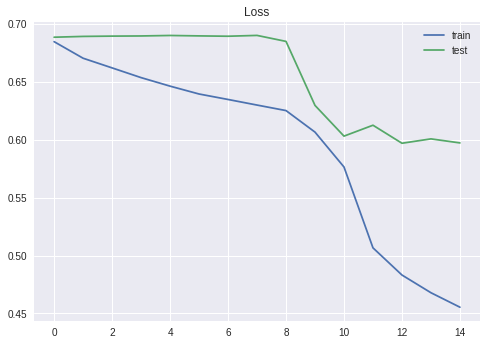

In [ ]:
plt.title('Loss')
plt.plot(history_lstm.history['loss'], label='train')
plt.plot(history_lstm.history['val_loss'], label='test')
plt.legend()
plt.show();

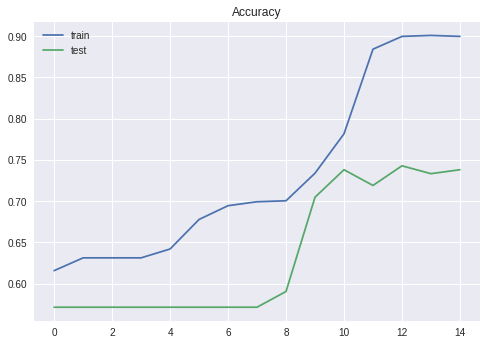

In [ ]:
plt.title('Accuracy')
plt.plot(history_lstm.history['accuracy'], label='train')
plt.plot(history_lstm.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
predicted_classes_lstm = model_lstm.predict(X_test_DL)
#print(predicted_classes)

9/9 [==============================] - 1s 26ms/step


In [ ]:
predicted_classes_lstm = np.argmax(np.round(predicted_classes_lstm),axis=1)
#print(predicted_classes)

In [ ]:
test_Y=[]
for i in range (263):
    for j in range (2):
        if(Y_test_DL[i][j]==1):
            test_Y.append(j)

print(len(test_Y))

263


In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(2)]
print(classification_report(test_Y, predicted_classes_lstm, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.78      0.60      0.68       101
     Class 1       0.78      0.90      0.84       162

    accuracy                           0.78       263
   macro avg       0.78      0.75      0.76       263
weighted avg       0.78      0.78      0.78       263



In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix

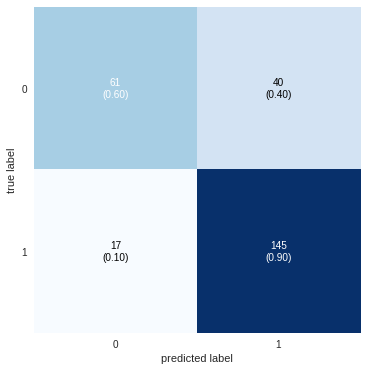

In [ ]:
mat=confusion_matrix(test_Y, predicted_classes_lstm)
fig, ax = plot_confusion_matrix(conf_mat=mat, figsize=(6,6), show_normed=True)
plt.show()

In [ ]:
#CNN MODEL................

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.layers import Embedding
from keras.preprocessing import sequence

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 200, 32)           5152      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 100, 32)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense_1 (Dense)             (None, 32)                102432    
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                      

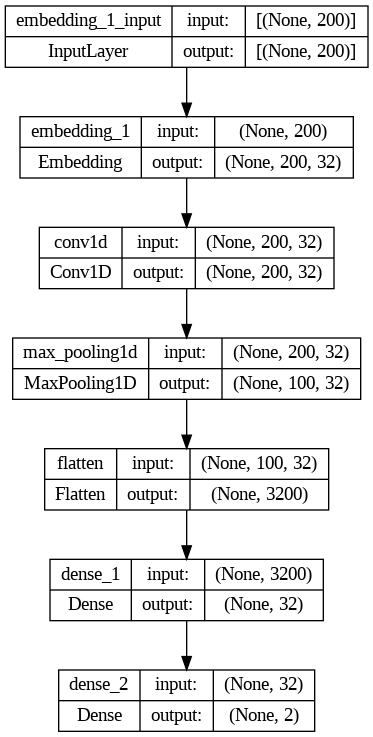

In [ ]:
EMBEDDING_DIM=32

model_cnn=Sequential()
model_cnn.add(Embedding(NUM_WORDS, EMBEDDING_DIM, input_length=X_DL.shape[1]))
model_cnn.add(Conv1D(32, 5, padding='same', activation='tanh'))
model_cnn.add(MaxPooling1D())
model_cnn.add(Flatten())
model_cnn.add(Dense(32, activation='tanh'))
model_cnn.add(Dense(Y_DL.shape[1], activation='sigmoid'))

model_cnn.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['acc'])

model_cnn.summary()

tf.keras.utils.plot_model(model_cnn, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

In [ ]:
epochs=15
batch_size=32

In [ ]:
history_cnn=model_cnn.fit(X_train_DL, Y_train_DL, epochs=epochs, batch_size=batch_size,  validation_split=0.2) 

Epoch 1/15
27/27 [==============================] - 2s 46ms/step - loss: 0.6606 - acc: 0.6146 - val_loss: 0.6738 - val_acc: 0.5714
Epoch 2/15
27/27 [==============================] - 1s 36ms/step - loss: 0.5216 - acc: 0.7351 - val_loss: 0.6217 - val_acc: 0.6143
Epoch 3/15
27/27 [==============================] - 1s 37ms/step - loss: 0.1810 - acc: 0.9690 - val_loss: 0.4628 - val_acc: 0.7571
Epoch 4/15
27/27 [==============================] - 1s 38ms/step - loss: 0.0288 - acc: 0.9976 - val_loss: 0.4583 - val_acc: 0.8095
Epoch 5/15
27/27 [==============================] - 1s 40ms/step - loss: 0.0140 - acc: 0.9976 - val_loss: 0.4928 - val_acc: 0.7810
Epoch 6/15
27/27 [==============================] - 1s 37ms/step - loss: 0.0078 - acc: 0.9988 - val_loss: 0.4769 - val_acc: 0.8095
Epoch 7/15
27/27 [==============================] - 2s 75ms/step - loss: 0.0069 - acc: 0.9988 - val_loss: 0.4911 - val_acc: 0.8238
Epoch 8/15
27/27 [==============================] - 3s 91ms/step - loss: 0.0044 - a

In [ ]:
acr_cnn=model_cnn.evaluate(X_test_DL, Y_test_DL)

print('Test set\n Loss: {:0.3f}\n Accuracy: {:0.3f}'.format(acr_cnn[0], acr_cnn[1]*100))

9/9 [==============================] - 0s 16ms/step - loss: 0.4266 - acc: 0.8441
Test set
 Loss: 0.427
 Accuracy: 84.411


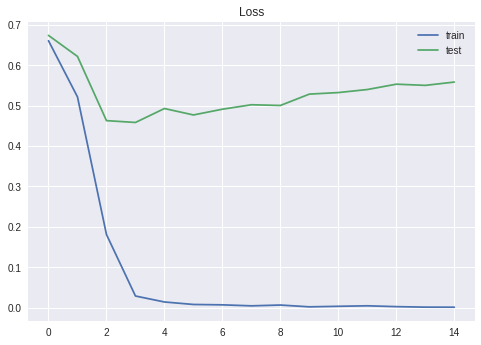

In [ ]:
plt.title('Loss')
plt.plot(history_cnn.history['loss'], label='train')
plt.plot(history_cnn.history['val_loss'], label='test')
plt.legend()
plt.show();

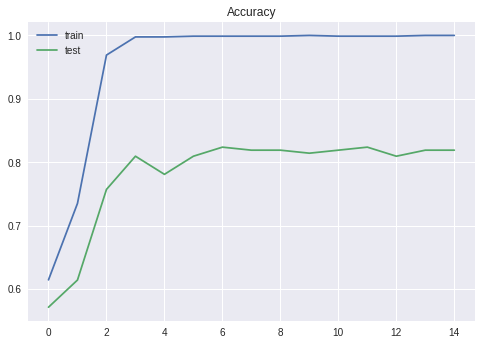

In [ ]:
plt.title('Accuracy')
plt.plot(history_cnn.history['acc'], label='train')
plt.plot(history_cnn.history['val_acc'], label='test')
plt.legend()
plt.show();

In [ ]:
predicted_classes_cnn = model_cnn.predict(X_test_DL)
#print(predicted_classes)

9/9 [==============================] - 0s 10ms/step


In [ ]:
predicted_classes_cnn = np.argmax(np.round(predicted_classes_cnn),axis=1)
#print(predicted_classes)

In [ ]:
test_Y_cnn=[]
for i in range (263):
    for j in range (2):
        if(Y_test_DL[i][j]==1):
            test_Y_cnn.append(j)

print(len(test_Y_cnn))

263


In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(2)]
print(classification_report(test_Y_cnn, predicted_classes_cnn, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.71      0.78       101
     Class 1       0.84      0.93      0.88       162

    accuracy                           0.84       263
   macro avg       0.85      0.82      0.83       263
weighted avg       0.85      0.84      0.84       263



In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 432x432 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

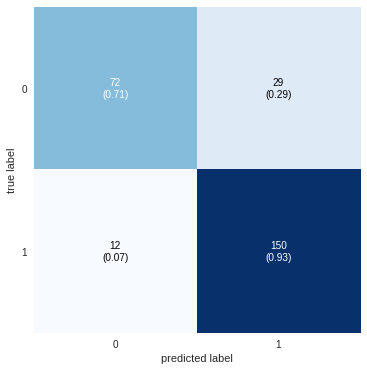

In [ ]:
mat=confusion_matrix(test_Y_cnn, predicted_classes_cnn)
plot_confusion_matrix(conf_mat=mat, figsize=(6,6), show_normed=True)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score,auc
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [ ]:
fpr_cnn,tpr_cnn,threshold_cnn=roc_curve(test_Y_cnn, predicted_classes_cnn)

In [ ]:
fpr,tpr,threshold=roc_curve(test_Y, predicted_classes_lstm)

In [ ]:
auc_cnn=auc(fpr_cnn, tpr_cnn)
auc=auc(fpr, tpr)
print(auc_cnn)
print(auc)

0.8193986065273193
0.7495110622173329


In [ ]:
random_probs=[0 for i in range(len(test_Y_cnn))]
p_fpr,p_tpr,_=roc_curve(test_Y_cnn, random_probs)

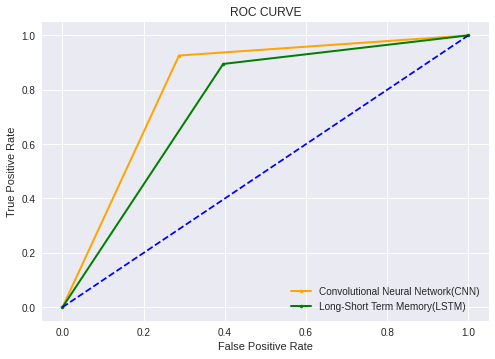

In [ ]:
plt.plot(fpr_cnn,tpr_cnn, marker='.', linewidth=2, color='orange', label='Convolutional Neural Network(CNN)')
plt.plot(fpr,tpr, marker='.', linewidth=2, color='green', label='Long-Short Term Memory(LSTM)')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')


plt.title('ROC CURVE')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()

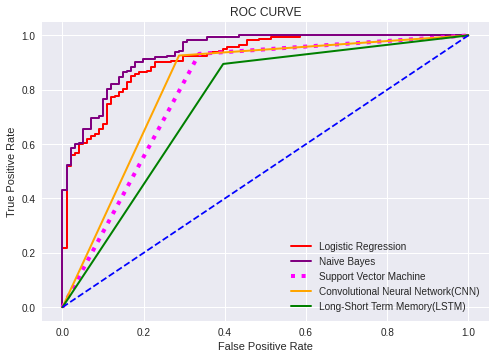

In [ ]:
plt.plot(fpr_log,tpr_log, linestyle='-', linewidth=2, color='red', label='Logistic Regression')
plt.plot(fpr_NB,tpr_NB, linestyle='-', linewidth=2, color='purple', label='Naive Bayes')
plt.plot(fpr_svm,tpr_svm, linestyle=':', linewidth=4, color='magenta', label='Support Vector Machine')
plt.plot(fpr_cnn,tpr_cnn, linestyle='-', linewidth=2, color='orange', label='Convolutional Neural Network(CNN)')
plt.plot(fpr,tpr, linestyle='-', linewidth=2, color='green', label='Long-Short Term Memory(LSTM)')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')


plt.title('ROC CURVE')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()